<a href="https://colab.research.google.com/github/sarabert96/Colexification/blob/main/06_AnalysisBootCosine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis Bootstrapped
The file does an analysis of the calculated probabilities.

In [ ]:
from google.colab import files
import pickle
import pandas as pd

Getting the file from drive

In [ ]:
!gdown --id 1tu36NAL3MyHMkajE7wEDffbF0OI5fidY #listBoot
# bootstrappping with 100 as number of cycle

Downloading...
From: https://drive.google.com/uc?id=1tu36NAL3MyHMkajE7wEDffbF0OI5fidY
To: /content/listBoot.txt
222MB [00:04, 44.8MB/s]


In [ ]:
with open("listBoot.txt", "rb") as fp:   # Unpickling
  lBoot = pickle.load(fp)

Let's group together all the results

In [ ]:
df =pd.DataFrame(lBoot[0])
df = df.drop(1,axis='columns')
df = df.drop(2,axis='columns')
dfT = df.T # transpose
dfT.columns = dfT.iloc[0]
dfT = dfT.drop(0, axis=0)


In [ ]:
dfT

,"(above, black)","(above, cart)","(above, circle)","(above, cloud)","(above, dig)","(above, heaven)","(above, high)","(above, hill)","(above, inside)","(above, laugh)","(above, line)","(above, month)","(above, moon)","(above, ride)","(above, roll)","(above, roof)","(above, shallow)","(above, sky)","(above, spin)","(above, tall)","(above, top)","(above, up)","(above, yesterday)","(abstain from food, shut)","(abstain from food, tie)","(abuse, answer)","(abuse, arrive)","(abuse, come back)","(abuse, donate)","(abuse, enter)","(abuse, give)","(abuse, grind)","(abuse, hear)","(abuse, hold)","(abuse, increase)","(abuse, itch)","(abuse, jump)","(abuse, knead)","(abuse, kneel)","(abuse, laugh)",...,"(young woman, young)","(young woman, younger sister)","(younger brother, ancestors)","(younger brother, bead)","(younger brother, carry on shoulder)","(younger brother, cousin)","(younger brother, jaw)","(younger brother, mosquito)","(younger brother, nephew)","(younger brother, seed)","(younger brother, sibling)","(younger brother, sister)","(younger brother, stocking)","(younger brother, then)","(younger brother, wife)","(younger brother, younger sibling)","(younger brother, younger sister)","(younger sibling, brother)","(younger sibling, different)","(younger sibling, older brother)","(younger sibling, younger brother)","(younger sister, brother)","(younger sister, cheese)","(younger sister, cousin)","(younger sister, daughter)","(younger sister, flea)","(younger sister, good)","(younger sister, healthy)","(younger sister, mosquito)","(younger sister, nephew)","(younger sister, niece)","(younger sister, older brother)","(younger sister, older sibling)","(younger sister, relatives)","(younger sister, sibling)","(younger sister, son)","(younger sister, stepdaughter)","(younger sister, then)","(younger sister, younger brother)","(younger sister, younger sibling)"
3,3.97472e-05,0.00552486,0.00552486,8.30806e-05,0.00276243,0.000101685,0.00027216,4.15403e-05,0.000134753,0.000269505,4.15403e-05,8.70057e-05,8.70057e-05,0.00414365,0.00552486,3.38949e-05,3.12139e-05,0.000532379,0.00552486,1.98736e-05,0.00623948,0.0148397,4.15403e-05,4.15403e-05,4.15403e-05,4.15403e-05,8.30806e-05,8.30806e-05,8.30806e-05,4.15403e-05,4.15403e-05,4.15403e-05,8.30806e-05,4.15403e-05,4.15403e-05,4.15403e-05,4.15403e-05,4.15403e-05,8.30806e-05,4.15403e-05,...,4.15403e-05,0.000124856,0.00110497,6.24278e-05,0.00025113,0.00634711,0.00184162,0.000230203,0.00619776,6.24278e-05,0.00554135,0.00554135,0.000197316,6.24278e-05,6.24278e-05,0.0150326,0.0637305,0.00289499,6.24278e-05,4.15403e-05,0.00841985,0.000132557,0.00552486,0.00135441,0.000124856,0.000306937,0.000181143,0.000181143,0.000230203,3.12139e-05,0.0006729,4.15403e-05,4.15403e-05,4.15403e-05,0.00647947,3.12139e-05,0.000230203,6.24278e-05,0.0112135,0.00852153


In [ ]:
for i in range(1,len(lBoot)):
  df_a =pd.DataFrame(lBoot[i])
  df_a = df_a.drop(1,axis='columns')
  df_a = df_a.drop(2,axis='columns')
  df_aT = df_a.T
  df_aT.columns = df_aT.iloc[0]
  df_aT = df_aT.drop(0, axis=0)
  dfT=dfT.append(df_aT)


In [ ]:
dfT

a little        above  ...  younger sister                
           what        black  ... younger brother younger sibling
3           NaN  3.97472e-05  ...       0.0112135      0.00852153
3           NaN  8.23014e-05  ...       0.0113797      0.00861991
3   4.35028e-05  9.08347e-05  ...       0.0111658      0.00844686
3   0.000130509          NaN  ...       0.0110809      0.00848559
3           NaN  0.000133389  ...       0.0112135       0.0057591
..          ...          ...  ...             ...             ...
3           NaN  7.94944e-05  ...       0.0112636      0.00850384
3   4.35028e-05  0.000133389  ...       0.0112777      0.00856413
3   0.000130509  0.000170329  ...        0.011263      0.00863373
3           NaN  0.000130582  ...        0.011197       0.0112675
3           NaN  0.000201543  ...       0.0112117       0.0111832

[100 rows x 56415 columns]

In [ ]:
dfTT = dfT.T

In [ ]:
dfTT

3  ...            3
a little       what                     NaN  ...          NaN
above          black            3.97472e-05  ...  0.000201543
               cart              0.00552486  ...   0.00276243
               circle            0.00552486  ...   0.00276243
               cloud            8.30806e-05  ...  4.15403e-05
...                                     ...  ...          ...
younger sister stepdaughter     0.000230203  ...          NaN
               then             6.24278e-05  ...  3.12139e-05
               wife                     NaN  ...          NaN
               younger brother    0.0112135  ...    0.0112117
               younger sibling   0.00852153  ...    0.0111832

[56415 rows x 100 columns]

In [ ]:
dfTT['Prob_mean'] = dfTT.mean(axis=1)

In [ ]:
dfTT.head()

3            3  ...            3 Prob_mean
a little what            NaN          NaN  ...          NaN  0.000061
above    black   3.97472e-05  8.23014e-05  ...  0.000201543  0.000094
         cart     0.00552486   0.00276243  ...   0.00276243  0.003659
         circle   0.00552486   0.00276243  ...   0.00276243  0.003659
         cloud   8.30806e-05  8.30806e-05  ...  4.15403e-05  0.000097

[5 rows x 101 columns]

In [ ]:
dfTT.shape

(56415, 101)

In [ ]:
import statistics
colex_len = []
for i in range(len(lBoot)):
  colex_len.append(len(lBoot[i]))
print (statistics.mean(colex_len))

40979.69


In [ ]:
dfTT['Prob_mean'].describe()

count    56415.000000
mean         0.001480
std          0.005391
min          0.000021
25%          0.000067
50%          0.000104
75%          0.000541
max          0.195116
Name: Prob_mean, dtype: float64

In [ ]:
dfTT[dfTT['Prob_mean']<0.000021]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean
dust,mosquito,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,1.64921e-05,NaN,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,NaN,NaN,1.64921e-05,4.94764e-05,NaN,1.64921e-05,1.64921e-05,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,...,1.64921e-05,NaN,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,3.29843e-05,NaN,NaN,NaN,3.29843e-05,4.94764e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,3.29843e-05,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,NaN,0.000021


In [ ]:
dfTT[dfTT['Prob_mean']>0.19]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean
moon,month,0.196057,0.202179,0.202277,0.194501,0.193262,0.193309,0.192701,0.192736,0.195787,0.189188,0.192982,0.180918,0.177822,0.197776,0.191352,0.195272,0.199011,0.193189,0.196434,0.189421,0.191228,0.19138,0.186978,0.199996,0.195703,0.200434,0.196019,0.19477,0.190198,0.193982,0.202147,0.211991,0.194817,0.198248,0.200897,0.204916,0.178943,0.192141,0.195051,0.199474,...,0.185918,0.203196,0.197711,0.196988,0.192954,0.195071,0.190216,0.197591,0.20341,0.20614,0.196367,0.180618,0.193868,0.202712,0.205995,0.193257,0.186766,0.190101,0.193175,0.212752,0.200849,0.196809,0.190625,0.19765,0.186234,0.19932,0.192444,0.208846,0.204826,0.196051,0.209694,0.200327,0.190556,0.196907,0.200029,0.188174,0.197355,0.191929,0.194442,0.195116


Since the values are very low, we modify them to improve performances on computation (only for this phase).

In [ ]:
probL = dfTT['Prob_mean']

In [ ]:
probL=probL*100

In [ ]:
probL = round(probL, 3)

In [ ]:
probL.describe()

count    56415.000000
mean         0.147981
std          0.539082
min          0.002000
25%          0.007000
50%          0.010000
75%          0.054000
max         19.512000
Name: Prob_mean, dtype: float64

Plotting the distribution (red line at 1)

In [ ]:
import matplotlib.pyplot as plt

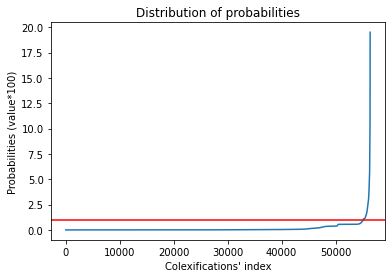

In [ ]:
import matplotlib.pyplot as plt
plt.plot(sorted(probL))
plt.title("Distribution of probabilities")
plt.ylabel('Probabilities (value*100)')
plt.xlabel("Colexifications' index")
plt.axhline(y = 1, color = 'r', linestyle = '-')
plt.show()

Box plot to see outliers.

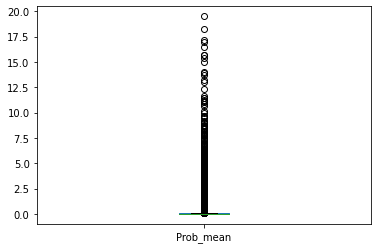

In [ ]:
ax = probL.plot.box()

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
data = probL

Log-scale histogram

(array([5.5867e+04, 3.3200e+02, 1.2000e+02, 4.3000e+01, 2.7000e+01,
        1.1000e+01, 3.0000e+00, 5.0000e+00, 5.0000e+00, 2.0000e+00]),
 array([2.0000e-03, 1.9530e+00, 3.9040e+00, 5.8550e+00, 7.8060e+00,
        9.7570e+00, 1.1708e+01, 1.3659e+01, 1.5610e+01, 1.7561e+01,
        1.9512e+01]),
 <a list of 10 Patch objects>)

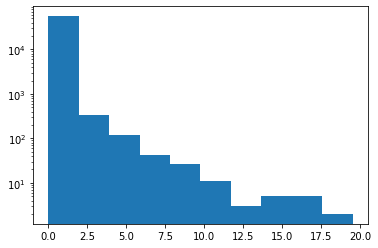

In [ ]:
plt.hist(data, log = True)

Function to plot a fancy histogram

In [ ]:
# code by https://towardsdatascience.com/advanced-histogram-using-python-bceae288e715

def smartHist (data):
  import matplotlib.pyplot as plt
  from matplotlib.patches import Rectangle
  import numpy as np

  # Take data
  #data = df_colex_prob['Prob']

  # Plot the Histogram from the data
  fig, ax = plt.subplots(figsize=(8, 8))

  '''
  counts  = numpy.ndarray of count of data ponts for each bin/column in the histogram
  bins    = numpy.ndarray of bin edge/range values
  patches = a list of Patch objects.
          each Patch object contains a Rectnagle object. 
          e.g. Rectangle(xy=(-2.51953, 0), width=0.501013, height=3, angle=0)
  '''
  counts, bins, patches = ax.hist(data, edgecolor='gray', log = True)


  # Set the ticks to be at the edges of the bins.
  ax.set_xticks(bins.round(2))
  plt.xticks(rotation=70)

  # Set the graph title and axes titles
  plt.title('Distribution of probabilities', fontsize=20)
  plt.ylabel('Count', fontsize=15)
  plt.xlabel('Probabilities', fontsize=15)
          
  # Calculate bar centre to display the count of data points and %
  #bin_x_centers = 0.5 * np.diff(bins) + bins[:-1]
  #bin_y_centers = ax.get_yticks()[1] * 0.25
  bin_x_centers = 0.75 * np.diff(bins) + bins[:-1]
  bin_y_centers = ax.get_yticks()[1] * 5

  # Display the the count of data points and % for each bar in histogram
  for i in range(len(bins)-1):
      bin_label = "{0:,}".format(counts[i]) + "  ({0:,.2f}%)".format((counts[i]/counts.sum())*100)
      plt.text(bin_x_centers[i], bin_y_centers, bin_label, rotation=90, rotation_mode='anchor')

  # Display the graph
  plt.show()

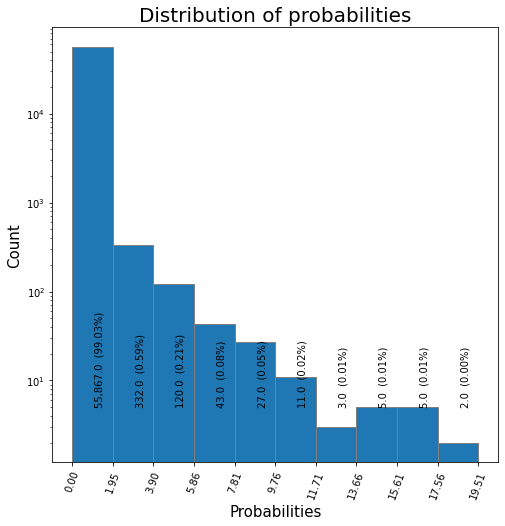

In [ ]:
smartHist (probL)

In [ ]:
# getting the percentage of rows with probability value higher than 1
(len(dfTT[dfTT['Prob_mean']>0.01])*100)/(len(dfTT)) # 0.01 because of multiplication

2.277763006292653

## Adding analysis of cosines values

Downloading the dataframe with the cosine values obtained from the original colexifications dataframe

In [ ]:
!gdown --id 1vTgCbYTHUpEmKPfB8asRYCe-olek65i0 #df_colex_cosines

Downloading...
From: https://drive.google.com/uc?id=1vTgCbYTHUpEmKPfB8asRYCe-olek65i0
To: /content/df_colex_cosines.csv
13.4MB [00:00, 36.9MB/s]


In [ ]:
df_cosine = pd.read_csv('df_colex_cosines.csv')

In [ ]:
df_cosine.head(2)

,Unnamed: 0,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
0,0,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,1927,bamboo,0.250825,"('gold', 'bamboo')"
1,1,s@,1369,hrus1242,gold,Hruso,Hruso Aka Jamiri,946,blood,0.244084,"('gold', 'blood')"


In [ ]:
df_cosine = df_cosine.iloc[: , 1:] # remove the first column

In [ ]:
df_cosine[df_cosine['Concepticon_pair']=="('green', 'yellow')"].head(5)
# we see we have more than one row for a single pair

,clics_form,Concepticon_ID.x,Glottocode,Concepticon_Gloss.x,Family,variety,Concepticon_ID.y,Concepticon_Gloss.y,cosine_sim,Concepticon_pair
3,dzju,1425,hrus1242,green,Hruso,Hruso Aka Jamiri,1424,yellow,0.682016,"('green', 'yellow')"
9079,madulaw,1425,cala1258,green,Austronesian,Kalamian,1424,yellow,0.682016,"('green', 'yellow')"
9080,mkach,1425,babu1240,green,Austronesian,Favorlang,1424,yellow,0.682016,"('green', 'yellow')"
9081,ghelh3,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"
9082,gheltos,1425,indo1319,green,Indo-European,Proto-Indo-European,1424,yellow,0.682016,"('green', 'yellow')"


We see that to a pair, correspond more than one row. In the following code we select [0] for this reason.

In [ ]:
dfTT.index

MultiIndex([(      'a little',            'what'),
            (         'above',           'black'),
            (         'above',            'cart'),
            (         'above',          'circle'),
            (         'above',           'cloud'),
            (         'above',         'country'),
            (         'above',            'deer'),
            (         'above',             'dig'),
            (         'above',           'flesh'),
            (         'above',          'heaven'),
            ...
            ('younger sister',       'relatives'),
            ('younger sister',            'sell'),
            ('younger sister',         'sibling'),
            ('younger sister',          'sister'),
            ('younger sister',             'son'),
            ('younger sister',    'stepdaughter'),
            ('younger sister',            'then'),
            ('younger sister',            'wife'),
            ('younger sister', 'younger brother'),
            ('y

In [ ]:
# getting the cosines values from the df, for every pair of the bootstrapped df
cosines = []
for c in dfTT.index:
  cosines.append(df_cosine[df_cosine['Concepticon_pair']==str(c)].cosine_sim.iloc[0])

In [ ]:
len(cosines)

56415

In [ ]:
dfTT['Cosine']=cosines # add the cosines to the df

Print the top ten rows depending on the probability

In [ ]:
dfTT.head()

3            3  ... Prob_mean    Cosine
a little what            NaN          NaN  ...  0.000061  0.237179
above    black   3.97472e-05  8.23014e-05  ...  0.000094  0.106036
         cart     0.00552486   0.00276243  ...  0.003659  0.128226
         circle   0.00552486   0.00276243  ...  0.003659  0.168535
         cloud   8.30806e-05  8.30806e-05  ...  0.000097  0.120798

[5 rows x 102 columns]

In [ ]:
dfTT['Cosine'].describe()

count    56415.000000
mean         0.209161
std          0.140753
min         -0.098452
25%          0.112914
50%          0.180208
75%          0.272005
max          0.997379
Name: Cosine, dtype: float64

In [ ]:
dfTT[dfTT['Cosine']<-0.09]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
black,announce,NaN,0.00220994,0.00110497,0.00110497,0.00110497,0.00110497,0.00220994,NaN,0.00110497,NaN,0.00110497,0.00110497,NaN,0.00220994,NaN,0.00110497,0.00220994,0.00110497,0.00110497,0.00110497,0.00220994,0.00110497,0.00110497,0.00110497,0.00110497,0.00110497,NaN,NaN,NaN,0.00220994,0.00110497,0.00110497,0.00220994,0.00331492,0.00110497,NaN,NaN,0.00110497,0.00220994,0.00110497,...,0.00110497,NaN,NaN,NaN,NaN,NaN,0.00110497,NaN,0.00110497,0.00110497,0.00110497,0.00110497,0.00220994,NaN,NaN,NaN,0.00110497,0.00110497,0.00110497,NaN,0.00110497,NaN,0.00220994,NaN,0.00110497,NaN,0.00110497,0.00110497,NaN,0.00220994,NaN,0.00110497,NaN,NaN,0.00110497,NaN,0.00110497,0.00110497,0.001457,-0.097655
launder,deaf,0.000460405,0.000460405,NaN,NaN,0.000460405,0.00138122,0.000460405,0.000460405,0.00092081,NaN,0.000460405,0.000460405,NaN,0.000460405,0.00138122,0.00138122,NaN,0.000460405,NaN,0.000460405,NaN,0.000460405,NaN,0.000460405,NaN,0.00138122,NaN,0.000460405,NaN,NaN,0.00138122,0.00138122,NaN,0.000460405,NaN,0.00092081,0.00184162,NaN,0.000460405,0.000460405,...,0.000460405,0.000460405,0.000460405,0.000460405,NaN,0.00092081,0.00092081,0.000460405,NaN,0.000460405,0.00138122,NaN,NaN,0.000460405,0.000460405,NaN,0.000460405,0.00138122,0.000460405,NaN,0.000460405,0.000460405,0.00092081,0.000460405,NaN,0.000460405,0.000460405,NaN,NaN,0.00092081,0.000460405,0.00138122,0.00092081,NaN,NaN,NaN,0.00092081,NaN,0.000698,-0.098452


In [ ]:
dfTT[dfTT['Cosine']>0.99]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
three days before now,four days before now,3.12139e-05,NaN,3.12139e-05,9.36417e-05,6.24278e-05,3.12139e-05,6.24278e-05,NaN,6.24278e-05,9.36417e-05,3.12139e-05,NaN,9.36417e-05,NaN,3.12139e-05,NaN,3.12139e-05,NaN,3.12139e-05,6.24278e-05,3.12139e-05,3.12139e-05,3.12139e-05,3.12139e-05,6.24278e-05,NaN,3.12139e-05,3.12139e-05,0.000124856,3.12139e-05,3.12139e-05,NaN,NaN,NaN,6.24278e-05,3.12139e-05,NaN,6.24278e-05,3.12139e-05,NaN,...,6.24278e-05,3.12139e-05,NaN,6.24278e-05,3.12139e-05,NaN,0.00015607,NaN,NaN,NaN,0.000124856,NaN,3.12139e-05,3.12139e-05,NaN,3.12139e-05,3.12139e-05,3.12139e-05,NaN,3.12139e-05,3.12139e-05,3.12139e-05,NaN,NaN,3.12139e-05,NaN,3.12139e-05,NaN,6.24278e-05,9.36417e-05,NaN,6.24278e-05,3.12139e-05,3.12139e-05,3.12139e-05,NaN,3.12139e-05,9.36417e-05,0.000051,0.997379


In [ ]:
topTenProb = sorted(list(dfTT['Prob_mean']))[-10]

In [ ]:
dfTT[dfTT['Prob_mean']>topTenProb]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
arm,hand,0.134685,0.155633,0.156582,0.165208,0.154814,0.156646,0.156476,0.151578,0.164091,0.15092,0.14518,0.156164,0.155395,0.16638,0.146531,0.157121,0.181163,0.165677,0.171583,0.144139,0.151964,0.152167,0.139277,0.161633,0.1538,0.149642,0.157271,0.164077,0.156773,0.158692,0.179735,0.169552,0.151092,0.158592,0.151721,0.160665,0.144554,0.166376,0.148594,0.164161,...,0.170038,0.148562,0.145797,0.152821,0.15369,0.155766,0.13899,0.152828,0.165572,0.163133,0.166135,0.145779,0.142466,0.156696,0.143465,0.14988,0.16315,0.159472,0.155135,0.165923,0.160253,0.156298,0.163583,0.147173,0.149808,0.13681,0.185456,0.159558,0.14999,0.165261,0.155576,0.146988,0.153792,0.146503,0.171158,0.16259,0.171843,0.16166,0.157208,0.496065
dish,plate,0.160599,0.171244,0.155593,0.171007,0.164716,0.171007,0.171416,0.163326,0.161854,0.164296,0.163462,0.16812,0.173194,0.16297,0.143052,0.168477,0.174696,0.178161,0.161225,0.168761,0.175925,0.158971,0.163602,0.175226,0.169692,0.159483,0.157429,0.167141,0.160968,0.166029,0.175452,0.161492,0.168223,0.165919,0.162718,0.160799,0.166542,0.162471,0.163402,0.165355,...,0.172957,0.174232,0.156201,0.158363,0.160522,0.149671,0.151654,0.165075,0.158672,0.157031,0.171334,0.160644,0.16212,0.17144,0.160051,0.148241,0.171863,0.165257,0.159631,0.163448,0.159612,0.155715,0.15869,0.161627,0.17229,0.160908,0.171007,0.15936,0.174261,0.167198,0.163061,0.154265,0.159063,0.146175,0.155993,0.166407,0.16227,0.150891,0.164458,0.489088
fingernail,claw,0.148328,0.15416,0.159857,0.151897,0.147329,0.151939,0.145379,0.153786,0.162291,0.144943,0.150125,0.155064,0.1506,0.156584,0.149334,0.158351,0.149749,0.161639,0.156892,0.148534,0.152358,0.15771,0.149341,0.161405,0.162758,0.153299,0.15447,0.15851,0.155624,0.154535,0.15989,0.166591,0.155428,0.147712,0.145978,0.154267,0.146977,0.152236,0.159075,0.153173,...,0.155598,0.158764,0.146217,0.156533,0.155562,0.146272,0.160277,0.153921,0.150705,0.146578,0.1599,0.153405,0.151479,0.168306,0.152321,0.148105,0.151277,0.146058,0.154568,0.162193,0.159657,0.151186,0.161554,0.156042,0.159798,0.148396,0.159037,0.163285,0.152353,0.152436,0.158257,0.151148,0.147598,0.147946,0.151675,0.162222,0.153974,0.138423,0.153805,0.430682
flesh,meat,0.171262,0.173337,0.168001,0.185648,0.167405,0.180072,0.17173,0.166968,0.181723,0.16486,0.167555,0.173808,0.165764,0.174292,0.160154,0.171884,0.172974,0.177634,0.165107,0.170624,0.177306,0.16482,0.168641,0.179168,0.176025,0.16557,0.165783,0.168028,0.171798,0.171875,0.182864,0.172599,0.175955,0.174688,0.164003,0.169282,0.168169,0.16494,0.172669,0.172562,...,0.166264,0.177725,0.167412,0.17014,0.166121,0.163147,0.174997,0.173302,0.171501,0.165457,0.171025,0.177271,0.166315,0.184776,0.167083,0.163896,0.173868,0.162967,0.16839,0.178154,0.177697,0.170918,0.176737,0.168487,0.175547,0.169326,0.179312,0.173908,0.174883,0.173055,0.172121,0.174103,0.166495,0.170654,0.174743,0.171082,0.174851,0.168726,0.171455,0.501161
grandson,granddaughter,0.162988,0.178463,0.169362,0.17777,0.157803,0.169014,0.173478,0.171861,0.180926,0.167205,0.169151,0.176581,0.169046,0.159742,0.165686,0.161954,0.1678,0.173716,0.153591,0.165607,0.18058,0.169979,0.167956,0.16249,0.182669,0.170589,0.165604,0.163283,0.162817,0.171062,0.168434,0.162873,0.175305,0.17037,0.15707,0.163958,0.169952,0.167688,0.175965,0.169481,...,0.171685,0.175532,0.168311,0.167356,0.168019,0.162081,0.17309,0.178792,0.170386,0.172857,0.165466,0.167932,0.164653,0.177425,0.169417,0.163563,0.173235,0.162626,0.179414,0.170827,0.182086,0.166797,0.1714,0.164594,0.177263,0.165388,0.168755,0.161507,0.173197,0.169786,0.165028,0.162659,0.171102,0.166735,0.17198,0.171719,0.173177,0.18008,0.169379,0.858003
hear,listen,0.155745,0.154493,0.156522,0.150766,0.151033,0.154578,0.164736,0.148101,0.156762,0.150168,0.155839,0.149998,0.148329,0.146648,0.151762,0.149252,0.142941,0.149232,0.1474

Print the top ten rows depending on the cosine similarity

In [ ]:
topTenCos = sorted(list(dfTT['Cosine']))[-10]

In [ ]:
dfTT[dfTT['Cosine']>topTenCos]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
different-sex older sibling,different-sex younger sibling,NaN,NaN,NaN,3.97472e-05,NaN,3.97472e-05,7.94944e-05,NaN,7.94944e-05,NaN,3.97472e-05,3.97472e-05,3.97472e-05,3.97472e-05,3.97472e-05,3.97472e-05,NaN,3.97472e-05,7.94944e-05,7.94944e-05,NaN,NaN,NaN,NaN,7.94944e-05,3.97472e-05,NaN,NaN,NaN,7.94944e-05,NaN,7.94944e-05,NaN,NaN,3.97472e-05,NaN,NaN,3.97472e-05,3.97472e-05,3.97472e-05,...,7.94944e-05,NaN,NaN,NaN,NaN,7.94944e-05,3.97472e-05,0.000158989,NaN,7.94944e-05,NaN,3.97472e-05,NaN,7.94944e-05,7.94944e-05,7.94944e-05,3.97472e-05,NaN,3.97472e-05,NaN,3.97472e-05,0.000119242,NaN,7.94944e-05,7.94944e-05,7.94944e-05,NaN,NaN,7.94944e-05,3.97472e-05,7.94944e-05,NaN,NaN,NaN,3.97472e-05,NaN,0.000119242,3.97472e-05,0.000067,0.965166
east,west,9.05715e-05,NaN,0.000362286,9.05715e-05,0.000181143,0.000271715,NaN,0.000181143,NaN,0.000181143,NaN,0.000181143,0.000271715,9.05715e-05,9.05715e-05,0.000181143,0.000271715,0.000271715,9.05715e-05,9.05715e-05,9.05715e-05,9.05715e-05,9.05715e-05,0.000362286,0.000362286,9.05715e-05,0.000181143,0.000181143,0.000181143,0.000362286,NaN,0.000181143,NaN,0.000452858,0.000181143,0.000362286,9.05715e-05,NaN,9.05715e-05,0.000452858,...,0.000271715,NaN,0.000181143,0.000181143,9.05715e-05,9.05715e-05,9.05715e-05,0.000181143,0.000181143,0.000362286,0.000271715,0.000181143,0.000271715,0.000271715,9.05715e-05,NaN,0.000271715,9.05715e-05,0.000362286,0.000452858,NaN,0.000181143,9.05715e-05,9.05715e-05,0.000271715,9.05715e-05,NaN,0.000271715,0.000181143,0.000271715,0.000362286,0.000181143,NaN,9.05715e-05,0.000362286,0.000181143,9.05715e-05,9.05715e-05,0.000199,0.965797
four,three,0.00571537,0.00590589,0.00552486,0.00571537,0.00552486,0.00590589,0.0060964,0.00571537,0.0060964,0.00628691,0.00571537,0.00628691,0.00571537,0.00590589,0.00590589,0.00590589,0.00552486,0.00552486,0.00590589,0.00571537,0.00590589,0.00647742,0.0060964,0.00552486,0.00571537,0.00571537,0.00590589,0.00590589,0.00571537,0.00571537,0.0060964,0.00571537,0.00590589,0.00571537,0.00590589,0.00552486,0.00571537,0.0060964,0.00590589,0.00552486,...,0.00571537,0.00552486,0.00628691,0.00590589,0.00571537,0.00571537,0.00590589,0.00571537,0.00552486,0.0060964,0.00571537,0.00571537,0.00590589,0.00571537,0.00590589,0.00571537,0.00628691,0.00552486,0.00590589,0.00590589,0.00571537,0.00571537,0.00571537,0.00571537,0.00571537,0.0060964,0.00628691,0.00647742,0.0060964,0.00628691,0.0060964,0.00590589,0.00571537,0.00571537,0.00571537,0.00571537,0.00590589,0.00552486,0.005862,0.977453
mother's brother,father's brother,0.0699409,0.0654391,0.0654967,0.061815,0.0690417,0.0671788,0.0669166,0.0602976,0.0546716,0.060129,0.0612835,0.0630056,0.0544053,0.0664241,0.0524151,0.0687839,0.0665615,0.0629933,0.0600499,0.0656198,0.0612052,0.064718,0.0631736,0.0715232,0.057114,0.0550115,0.0685636,0.0734151,0.0570063,0.0701732,0.0734286,0.0614106,0.0536778,0.0668162,0.062838,0.0726034,0.0584629,0.0689003,0.0602642,0.0634293,...,0.0654281,0.0644768,0.061871,0.0682249,0.0651157,0.0592212,0.0629909,0.0652861,0.0677844,0.0687194,0.0635307,0.0588742,0.0674935,0.0620087,0.0630574,0.0540477,0.0623513,0.066186,0.0640035,0.0703545,0.0573233,0.0650016,0.0578835,0.0630532,0.0709838,0.0649391,0.0729753,0.0662008,0.0682402,0.0663933,0.0625072,0.0567951,0.0596729,0.0530041,0.0527242,0.065223,0.0643278,0.0544699,0.063158,0.989379
mother's sister,father's sister,0.0522651,0.0508823,0.0581232,0.0494171,0.0518727,0.0532299,0.0496403,0.0452781,0.0447504,0.0494892,0.0486652,0.0464167,0.0434622,0.0544564,0.044955,0.0539108,0.0542627,0.0515121,0.0528514,0.0500459,0.0486997,0.0504461,0.0492323,0.0585923,0.0475454,0.0447112,0.0557011,0.0599799,0.0459493,0.0542595,0.0628642,0.054193,0.0456882,0.0566303,0.0490512,0.0566765,0.0474345,0.0539019,0.0504072,0.0514824,...,0.053769,0.0536416,0.0450228,0.0521041,0.0537281,0.0449265,0.0541586,

We see that the pairs don't coincide

Plot distribution of cosines

In [ ]:
import matplotlib as plt

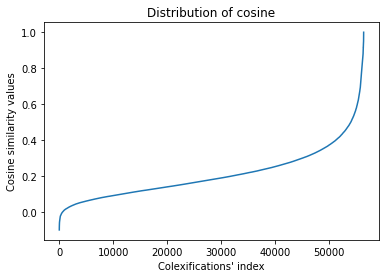

In [ ]:
plt.plot(sorted(list(dfTT['Cosine'])))
plt.title("Distribution of cosine")
plt.ylabel('Cosine similarity values')
plt.xlabel("Colexifications' index")
#plt.axhline(y = 0.5, color = 'r', linestyle = '-')
plt.show()

In [ ]:
import numpy as np

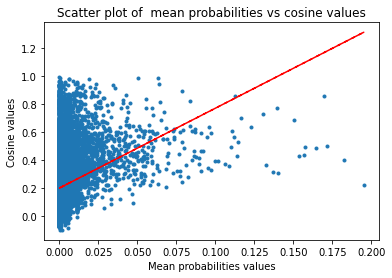

In [ ]:
plt.title("Scatter plot of  mean probabilities vs cosine values")
plt.ylabel('Cosine values')
plt.xlabel("Mean probabilities values")
x = dfTT['Prob_mean']
y = dfTT['Cosine']
plt.scatter(x,y, marker='.')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [ ]:
df_plot = dfTT[dfTT.Prob_mean>0.01] # create a new df with only high prob for plotting reasons

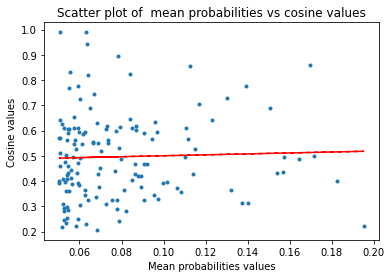

In [ ]:
plt.title("Scatter plot of  mean probabilities vs cosine values")
plt.ylabel('Cosine values')
plt.xlabel("Mean probabilities values")
x = df_plot['Prob_mean']
y = df_plot['Cosine']
plt.scatter(x,y, marker='.')
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")
plt.show()

In [ ]:
dfTT[dfTT['Prob_mean']<0.000021]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
dust,mosquito,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,1.64921e-05,NaN,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,NaN,NaN,1.64921e-05,4.94764e-05,NaN,1.64921e-05,1.64921e-05,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,...,NaN,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,3.29843e-05,NaN,NaN,NaN,3.29843e-05,4.94764e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,3.29843e-05,3.29843e-05,1.64921e-05,1.64921e-05,NaN,NaN,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,1.64921e-05,NaN,1.64921e-05,1.64921e-05,NaN,NaN,0.000021,0.251982


In [ ]:
dfTT[dfTT['Prob_mean']>0.19]

,,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,Prob_mean,Cosine
moon,month,0.196057,0.202179,0.202277,0.194501,0.193262,0.193309,0.192701,0.192736,0.195787,0.189188,0.192982,0.180918,0.177822,0.197776,0.191352,0.195272,0.199011,0.193189,0.196434,0.189421,0.191228,0.19138,0.186978,0.199996,0.195703,0.200434,0.196019,0.19477,0.190198,0.193982,0.202147,0.211991,0.194817,0.198248,0.200897,0.204916,0.178943,0.192141,0.195051,0.199474,...,0.203196,0.197711,0.196988,0.192954,0.195071,0.190216,0.197591,0.20341,0.20614,0.196367,0.180618,0.193868,0.202712,0.205995,0.193257,0.186766,0.190101,0.193175,0.212752,0.200849,0.196809,0.190625,0.19765,0.186234,0.19932,0.192444,0.208846,0.204826,0.196051,0.209694,0.200327,0.190556,0.196907,0.200029,0.188174,0.197355,0.191929,0.194442,0.195116,0.221915


data1: mean=0.001 stdv=0.005
data2: mean=0.209 stdv=0.141


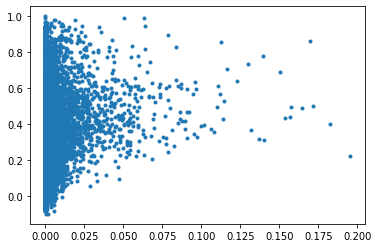

In [ ]:
# code from https://machinelearningmastery.com/how-to-use-correlation-to-understand-the-relationship-between-variables/
# generate related variables
from numpy import mean
from numpy import std
from numpy.random import randn
from numpy.random import seed
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
data1 = dfTT['Prob_mean']
data2 = dfTT['Cosine']
# summarize
print('data1: mean=%.3f stdv=%.3f' % (mean(data1), std(data1)))
print('data2: mean=%.3f stdv=%.3f' % (mean(data2), std(data2)))
# plot
pyplot.scatter(data1, data2, marker = '.')
pyplot.show()

We cannot use covariance neither Pearson's correlation because the distribution of the variables are not Gaussian

Spearman's correlation

In [ ]:
# calculate the spearmans's correlation between two variables
from scipy.stats import spearmanr
# calculate spearman's correlation
corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.138
